In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#importing data
userdata1=pd.read_csv("takehome_users.csv", encoding='ISO-8859-1')
userdata2=pd.read_csv("takehome_user_engagement.csv" , parse_dates =['time_stamp'])

#merged both the files
merged_userdata = pd.merge(userdata1, userdata2, left_on='object_id' , right_on='user_id')

In [3]:
#Extracting values from date
merged_userdata['date'] = merged_userdata['time_stamp'].astype('datetime64')
merged_userdata['week'] = merged_userdata['date'].dt.isocalendar().week
merged_userdata['year'] = merged_userdata['date'].dt.isocalendar().year
merged_userdata['month'] = merged_userdata['date'].dt.month

#Creating DF after grouping with the required data
grouped_data=merged_userdata.groupby(['user_id','org_id','year' ,'month', 'week' , 'visited']).size()
dff = grouped_data.to_frame(name = 'weekly_visited').reset_index()


In [4]:
#Filtering the "weekly_visit" by 3 or more times of visit
df1 = dff[dff['weekly_visited'] >= 3]
df1

,user_id,org_id,year,month,week,visited,weekly_visited
23,10,318,2013,2,6,1,3
24,10,318,2013,2,7,1,3
27,10,318,2013,3,10,1,5
28,10,318,2013,3,11,1,3
31,10,318,2013,4,14,1,3
...,...,...,...,...,...,...,...
83532,11975,31,2014,12,49,1,4
83552,11988,114,2014,3,12,1,4
83559,11988,114,2014,4,18,1,3
83561,11988,114,2014,5,20,1,3


## Pie chart which shows overall user adoption through various medium.

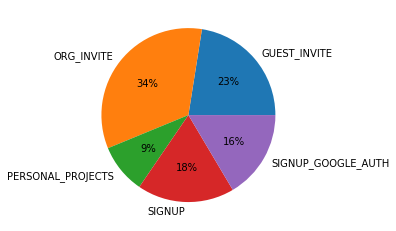

In [5]:
#Taking data from "creation_source" column
countt= merged_userdata.groupby(['creation_source']).size()
countt = countt.to_frame(name = 'size').reset_index()


#Pie chart which shows Account "Creation Source" details
y = np.array(countt['size'])
label = np.array(countt['creation_source'])


plt.pie(y, labels =label, autopct='%1.0f%%')
plt.show()

## Bar chart shows the Top users and their login counts

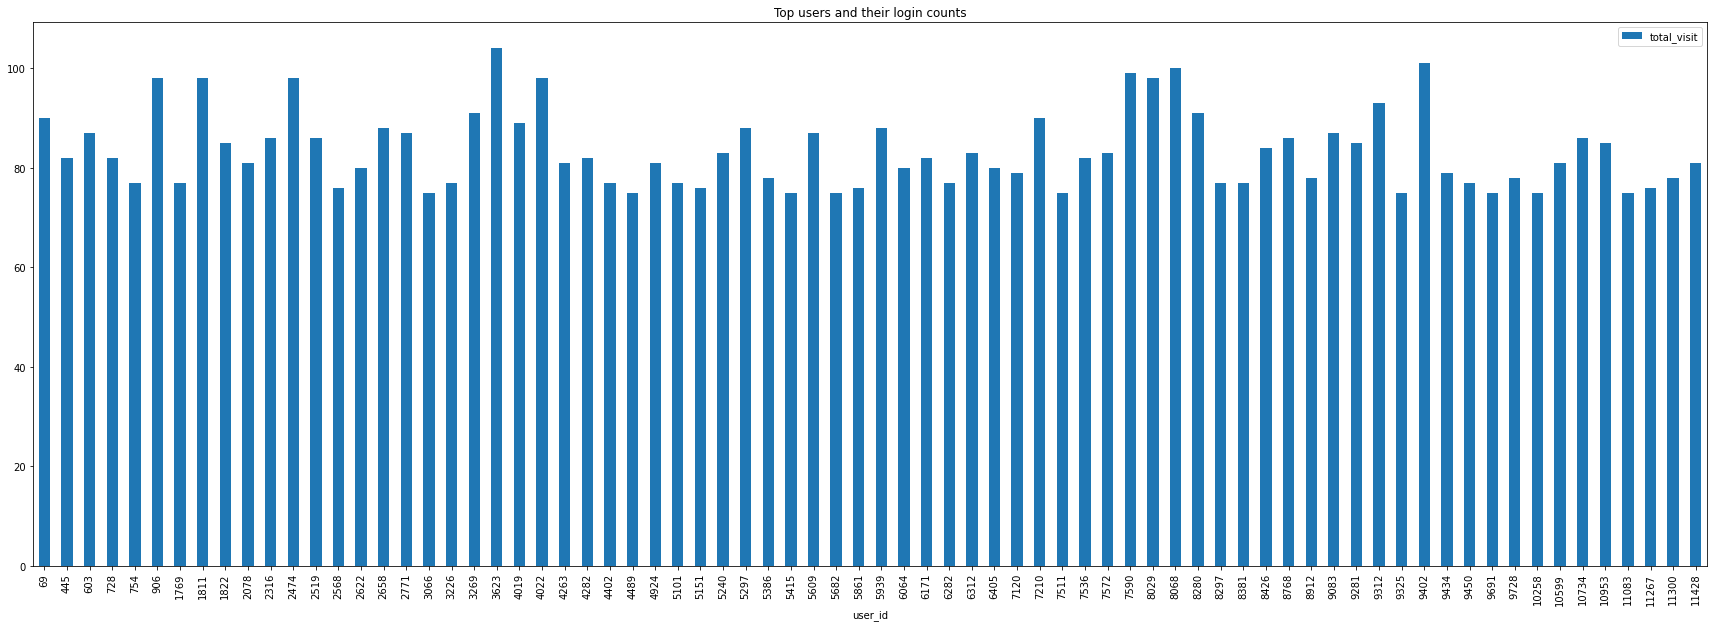

In [6]:
#Groupong both columns and creating df2
df2 = df1
df2 = df2.groupby(['user_id','org_id']).size()
df2 = df2.to_frame(name = 'total_visit').reset_index()

#Filtering top 25% of users and their login counts
top= df2[df2['total_visit'] >=75]

#Bar chart which shows Top users and their login counts
top.plot.bar(x='user_id', y='total_visit', figsize=(30,10), title="Top users and their login counts")
plt.show()

## Pie chart which shows the customer adoption in Top users

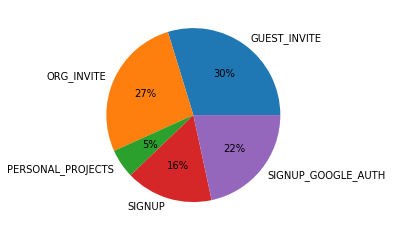

In [7]:
#Merging the actual data with the top user's data 
top_users= pd.merge(userdata1,top,  left_on='object_id' , right_on='user_id')

cnt= top_users.groupby(['creation_source']).size()
cnt=cnt.to_frame(name='size').reset_index()

#Pie chart which shows the user adoption in top users
y=np.array(cnt['size'])
label=np.array(cnt['creation_source'])

plt.pie(y, labels= label, autopct='%1.0f%%')
plt.show()

## In top users, 79% of users are acquired through "GUEST_INVITE", "ORG_INVITE" and "SIGNUP_GOOGLE_AUTH"